In [98]:
import numpy as np
import matplotlib.pyplot as plt
from pyTMD.time import convert_calendar_dates, datetime_to_list
from pyTMD.io import model, GOT
from pyTMD.predict import time_series, infer_minor


In [99]:
lon = 122.26672
lat = 23.76175

# Model parameters
model_directory = '/media/X/temp/tide/GOT4.10/'
model_format = 'netcdf'
compressed = False


In [103]:
# Create model object
tide_model = model(model_directory, format=model_format, compressed=compressed).elevation('GOT4.10')

# Load and interpolate tidal constants
constituents = GOT.read_constants(
    tide_model.model_file, compressed=tide_model.compressed)
amp, ph = GOT.interpolate_constants(np.array([lat]), np.array([lon]), 
                                    constituents, scale=tide_model.scale, 
                                    method='spline', extrapolate=True)

print(amp)
print(ph)
print(len(constituents))
print(amp.shape)
print(ph.shape)

[[0.0023999998811632395 0.014199999161064625 0.009499999694526196
  0.031300000846385956 0.016300000250339508 0.05250000208616257
  0.02329999953508377 0.006199999712407589 -- --]]
[[23.92000207720707 333.6900396001246 286.42999022323085
  284.14002587001147 43.860001698628935 60.430003059039436
  117.09000124342029 121.11000470207968 -- --]]
10
(1, 10)
(1, 10)


In [101]:
from datetime import datetime, timedelta

# Only one day timing (24 hours, 1-hour intervals)
# hours = np.arange(0, 24, 1)
# tide_time = convert_calendar_dates(2023, 7, 24, hour=hours)

# Create a list to hold all the hours arrays
# all_hours = []
# all_tide_times = []

# Generate arrays for each day
# for day in range(25, 29):  # 25, 26, 27, 28
#    hours = np.arange(0, 24, 1)
#    all_hours.append(hours)
#    
#    tide_time = convert_calendar_dates(2023, 7, day, hour=hours)
#    all_tide_times.append(tide_time)

# Concatenate all the arrays
# hours = np.concatenate(all_hours)
# tide_time = np.concatenate(all_tide_times)
# print(tide_time)

# Create start and end date
start_date = datetime(2023, 7, 25)
end_date = datetime(2023, 7, 28)

# Generate a list of every hour between start and end date
dtime = []
tide_time = []
while start_date <= end_date:
    dtime.append(start_date)
    dtlist = datetime_to_list(start_date)
    tide_time.append(convert_calendar_dates(dtlist[0], dtlist[1], dtlist[2], dtlist[3]))
    start_date += timedelta(hours=1)

tide_time = np.array(tide_time)
print(tide_time)

[11528.         11528.04166667 11528.08333333 11528.125
 11528.16666667 11528.20833333 11528.25       11528.29166667
 11528.33333333 11528.375      11528.41666667 11528.45833333
 11528.5        11528.54166667 11528.58333333 11528.625
 11528.66666667 11528.70833333 11528.75       11528.79166667
 11528.83333333 11528.875      11528.91666667 11528.95833333
 11529.         11529.04166667 11529.08333333 11529.125
 11529.16666667 11529.20833333 11529.25       11529.29166667
 11529.33333333 11529.375      11529.41666667 11529.45833333
 11529.5        11529.54166667 11529.58333333 11529.625
 11529.66666667 11529.70833333 11529.75       11529.79166667
 11529.83333333 11529.875      11529.91666667 11529.95833333
 11530.         11530.04166667 11530.08333333 11530.125
 11530.16666667 11530.20833333 11530.25       11530.29166667
 11530.33333333 11530.375      11530.41666667 11530.45833333
 11530.5        11530.54166667 11530.58333333 11530.625
 11530.66666667 11530.70833333 11530.75       11530.79

In [96]:
# calculate complex phase in radians for Euler's
cph = -1j * ph * np.pi / 180.0
# calculate constituent oscillation
hc = amp * np.exp(cph)
c = constituents.fields
DELTAT = np.zeros_like(tide_time)

# Predict tide
tide = time_series(tide_time, hc, c, deltat=DELTAT, corrections=tide_model.format)
minor = infer_minor(tide_time,hc, c, deltat=DELTAT, corrections=tide_model.format)
tide.data[:] += minor.data[:]
# convert to centimeters
tide.data[:] *= 100.0
print(tide.data.shape)

(73,)


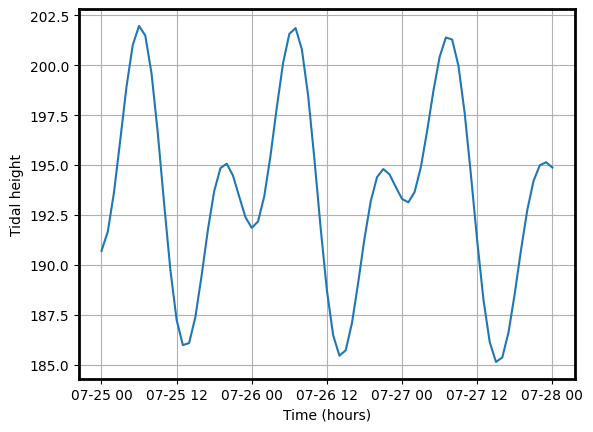

In [97]:
# Plot tidal height
plt.figure()
plt.plot(dtime, tide.data)
plt.xlabel('Time (hours)')
plt.ylabel('Tidal height')
plt.grid()
plt.show()


In [58]:
# available model list for current
model_list = sorted(model.global_current() + model.antarctic_current())
print(model_list)

['CATS0201', 'CATS2008', 'CATS2022', 'FES2014', 'HAMTIDE11', 'TPXO7.2', 'TPXO8-atlas', 'TPXO9-atlas', 'TPXO9-atlas-v2', 'TPXO9-atlas-v3', 'TPXO9-atlas-v4', 'TPXO9-atlas-v5', 'TPXO9.1']


In [57]:
# Get tidal current coefficients
amp_u, ph_u, amp_v, ph_v = tide_model.current('GOT4.10')

ValueError: Unlisted tide model GOT4.10

In [ ]:
constituents = pyTMD.io.GOT.read_constants(
    model.model_file, compressed=model.compressed)
fields = constituents.fields
print(constituents)
print(fields)

print(model.model_file)

for TYPE in model.type:
    print(TYPE)
    #print(model.model_file[TYPE]))

In [ ]:
amp, ph = pyTMD.io.GOT.interpolate_constants(
    np.atleast_1d(lon), np.atleast_1d(lat),
    constituents,
    scale=tide_model.scale,
    method='spline', extrapolate=True)

print(amp)
print(ph)
print(len(constituents))
print(amp.shape)
print(ph.shape)


[[0.03094635158777237 0.15203270316123962 0.05699879676103592
  0.17678311467170715 0.08909143507480621 0.46022817492485046
  0.18888415396213531 0.05151062458753586 0.006959219928830862
  0.000931619550101459]]
[[65.07544693999688 77.45348458410918 96.73906329058461 98.6935355819621
  289.27994812612116 297.7107033356672 322.3279755195788
  322.74016036051614 285.5490802354068 239.10600686061116]]
10
(1, 10)
(1, 10)


In [ ]:
amp,ph,D,c = pyTMD.io.ATLAS.extract_constants(lon, lat, model.grid_file,
    model.model_file[TYPE], type=TYPE, method='spline',
    scale=model.scale, compressed=model.compressed)

# calculate complex phase in radians for Euler's
cph = -1j*ph*np.pi/180.0
# calculate constituent oscillation
hc = amp*np.exp(cph)
print(amp)
print(ph)
print(c)
print(cph)
print(hc)


In [5]:
import matplotlib.pyplot as plt

# 假設時間間隔為1小時，共24個時間點
hours = np.arange(0, 24, 1)
t = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)

# 計算潮高
ht = np.sum(amp * np.cos(omega * t - ph), axis=1)

# 計算u和v合成的潮位
u = np.sum(amp * np.cos(omega * t - ph + alpha), axis=1)
v = np.sum(amp * np.sin(omega * t - ph + alpha), axis=1)

# 繪製潮高圖
plt.plot(hours, ht)
plt.xlabel('時間（小時）')
plt.ylabel('潮高（單位）')
plt.title('潮高變化')
plt.grid(True)
plt.show()

# 繪製u和v合成的潮位圖（假設圖形向上為正北）
plt.quiver(hours, np.zeros_like(hours), u, v, scale=1, scale_units='xy', angles='xy')
plt.xlabel('時間（小時）')
plt.ylabel('u/v合成潮位（單位）')
plt.title('u和v合成潮位變化')
plt.grid(True)
plt.show()

NameError: name 'omega' is not defined